このブログは[Hugo](https://gohugo.io/)というStatic Site Generatorで生成しています。おおむね不満はないのですが、最近[Jupyter Notebook](http://jupyter-notebook.readthedocs.io/en/latest/)をHugoのコンテンツとして扱いたいという欲求が出てきました。

ざっと調べたところ、HugoでJupyter Notebookを表示するには[jupyter nbconvert](https://github.com/jupyter/nbconvert)を使う方法が一般的なようです。[^1]

```bash
jupyter nbconvert --to markdown path/to/notebook.ipynb
```

これでJupyter NotebookがMarkdownに変換されます。これをコピペすれば目的を達成できます。ですが、いちいちMarkdownに変換してコピペするのは面倒ですし、`hugo server -w`などでリアルタイムプレビューできないのも不便です。

HugoはHTMLもコンテンツとして扱えますが、それでも`jupyter nbconvert`で変換する必要があるため`.ipynb`ファイルと2重管理になっていまいます。

「そうじゃない、私は`.ipynb`をそのままHugoのコンテンツとして扱いたいんだ！」

そういう強い想いによって、今回紹介するJupyter Notebook自体を直接Hugoのコンテンツとして表示できるようにする *Jupyter Notebook Handler for Hugo* が生まれました。

## Jupyter Notebook Handler for Hugo

https://github.com/naoina/hugo-jupyter-handler

HugoはMarkdownやAsciiDocをコンテンツとして使えます。それらはHandlerとして実装され、コンパイルタイムプラグインとしてHugoに組み込まれています。[^2]
この機構を使ってJupyter Notebookをコンテンツとして使えるようにしました。

## 使い方

### 準備

まずはJupyter Notebook Handlerをインストールします。

```bash
go get -u -v github.com/naoina/hugo-jupyter-handler
```

次に`.ipynb`ファイルを用意します。この記事を見ているかたならばいくつも持ってると思うので問題ないですね。

### `frontmatter`メタデータを設定する

`.ipynb`ファイルを開き、*Edit* → *Edit Notebook Metadata* から`frontmatter`メタデータを設定します。

```json
{
  "frontmatter": {
    "title": "Jupyter NotebookをHugoのコンテンツとして使う方法",
    "date": "2017-07-26T11:51:30+09:00",
    "tags": [
      "Jupyter Notebook",
      "Hugo",
      "Go"
    ]
  },
  "kernelspec": {
    "name": "python3",
    "display_name": "Python 3",
    "language": "python"
  },
  "language_info": {
    "name": "python",
    "version": "3.6.1",
    "mimetype": "text/x-python",
    "codemirror_mode": {
      "name": "ipython",
      "version": 3
    },
    "pygments_lexer": "ipython3",
    "nbconvert_exporter": "python",
    "file_extension": ".py"
  }
}
```

`.ipynb`ファイルの中身はJSONなので、適当なテキストエディタで`.ipynb`ファイルを開いて編集してもいいでしょう。
設定した`frontmatter`メタデータはそのままHugoの[Frontmatter](https://gohugo.io/content-management/front-matter/)として使われます。

### コンテンツディレクトリに配置する

`frontmatter`メタデータを設定した`.ipynb`ファイルをHugoサイトのコンテンツディレクトリに配置します。通常は`content/`以下です。

### Hugo CLIにJupyter Notebook Handlerをコンパイルタイムプラグインとして組み込む

下記コードをHugoサイトのルートディレクトリに`hugo.go`として配置します。ここでは`hugo.go`としますが、ファイル名は何でもいいです。

```go
package main

import (
	"os"
	"runtime"

	"github.com/gohugoio/hugo/commands"
	jww "github.com/spf13/jwalterweatherman"

	_ "github.com/naoina/hugo-jupyter-handler"
)

func main() {
	runtime.GOMAXPROCS(runtime.NumCPU())
	commands.Execute()
	if jww.LogCountForLevelsGreaterThanorEqualTo(jww.LevelError) > 0 {
		os.Exit(-1)
	}

	if commands.Hugo != nil {
		if commands.Hugo.Log.LogCountForLevelsGreaterThanorEqualTo(jww.LevelError) > 0 {
			os.Exit(-1)
		}
	}
}
```

このコードをHugo CLIの代わりに使います。

```bash
go run hugo.go server -w
```

また、Jupyter Notebook Handlerを組み込んだ独自のHugo CLIとしてビルドして使用してもかまいません。こちらのほうが毎回コンパイルが走らないぶん起動が速いです。

```bash
go build -o hugo
./hugo server -w
```

## 表示

実際に`.ipynb`から生成したものが今見ているこのブログ記事です。この記事は

https://github.com/naoina/kuune.org/blob/master/content/text/how-to-use-jupyter-notebook-as-hugo-content.ipynb

とJupyter Notebook Handlerを組み込んだHugoによって生成されています。

試しにコードも書いてみます。
これが

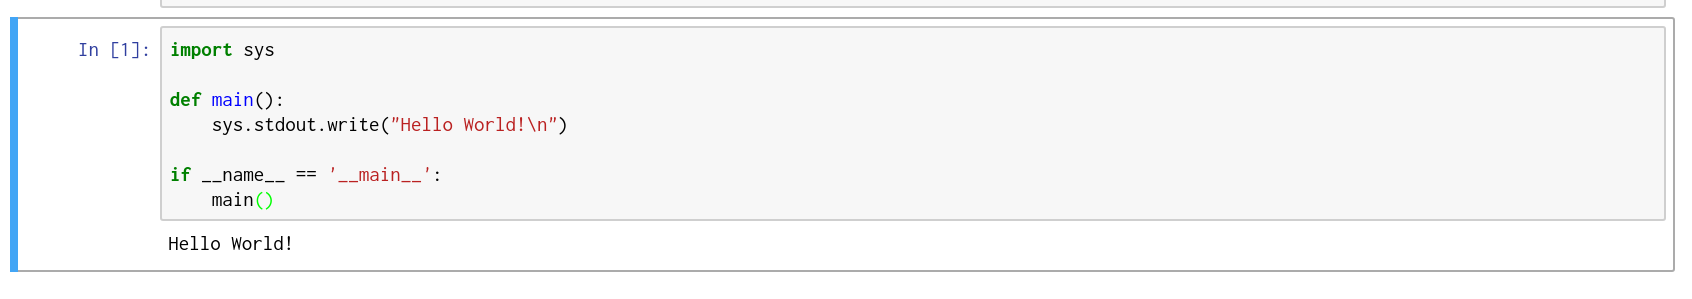

こうなります。

In [1]:
import sys

def main():
    sys.stdout.write("Hello World!\n")
    
if __name__ == '__main__':
    main()に

Hello World!


便利！

## まとめ

Jupyter Notebookはすこぶる便利なので、Jupyter Notebookで書いたコードをそのままブログ記事にしたいということが稀によくあります。そんなときでもHugoでJupyter Notebookが表示できるようになると、動かないコードを載せてしまうことが無くなったり、検証結果の図などを簡単にブログ記事に載せることが可能になって素晴らしくはかどります。みなさんもHugo + Jupyter Notebookでブログを書いてみてはどうでしょうか。

Jupyter Notebook Handlerについては、いろいろと足りない部分があることは把握しています。ですが、現状自分の用途では必要十分なので問題に遭遇したら都度対応する方針です。もちろんPull RequestはいつでもWelcomeです。

https://github.com/naoina/hugo-jupyter-handler

[^1]: `hugo jupyter`で検索するとたくさん出てきます。
[^2]: https://github.com/gohugoio/hugo/blob/9ed48c1c9ae4cd9390f5ef88c8b2b6624e9e247d/hugolib/handler_page.go